In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

* t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space

In [24]:
data = pd.read_csv('train.csv')

In [25]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.shape

(42000, 785)

In [33]:
label = data.iloc[:,:1].values

In [34]:
data.iloc[1,1:].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  18,  30, 137, 137, 192,  86,  72,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  13,  86, 250, 254, 254, 254, 254, 217,
       246, 151,  32,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  16, 179, 254, 254, 254, 25

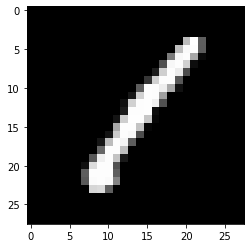

In [27]:
single_img= data.iloc[0,1:].values.reshape(28,28)
plt.imshow(single_img, cmap='gray')

In [28]:
tsne= manifold.TSNE(n_components=2, random_state=42)
transformed_data  = tsne.fit_transform(data.iloc[:3000,:].values)

In [35]:
tsne_df= pd.DataFrame(np.column_stack((transformed_data,label[:3000])),columns=['X','Y','targets'])

In [36]:
tsne_df.head()

,X,Y,targets
0,58.031338,23.975752,1.0
1,-18.270119,-72.529846,0.0
2,19.906748,20.407740,1.0
3,-53.429012,2.933744,4.0
4,-18.690632,-71.960762,0.0


In [37]:
tsne_df.loc[:,'targets']= tsne_df.targets.astype(int)

c:\users\uttam\anaconda3\envs\anml\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


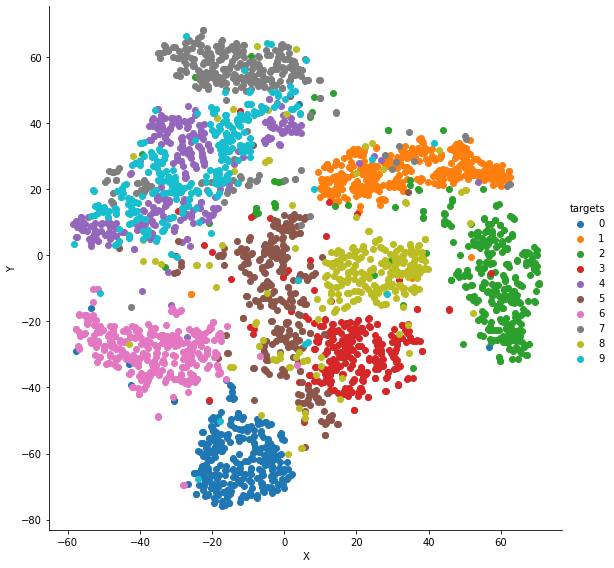

In [38]:
grid= sns.FacetGrid(tsne_df,hue='targets', size=8)
grid.map(plt.scatter,'X','Y').add_legend()